<a href="https://colab.research.google.com/github/mayuneko-re/notebook/blob/master/Buckley_Leverett_Gravity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 水油置換問題の重力の影響（Buckley-Leverettによる解法）

Version 0.2 (Oct. 2019)

油で満たされている多孔質媒体に水を圧入し水攻するとき，一次元／非圧縮／非混和条件を仮定すると，Buckley-Leverettの解法により、ある時間に対する飽和率分布を解析的に求めてみました．[Buckley-Leverett Solution for water-oil displacement problem](https://github.com/mayuneko-re/notebook/blob/master/Buckley_Leverett_Basic.ipynb)

上記のノートブックでは重力の影響を無視していたので，ここでは重力の影響を確認したいと思います．

## 重力を考慮したフラクショナルフロー

毛細管圧力による影響は無視し，重力の影響を考慮した場合の水のフラクショナルフロー関数は（いろいろ表し方はありますが）次のようになります．

$$
f_w = \frac{\lambda_w}{\lambda_t} \left( 1 - k_{ro} N_g  \sin \theta \right)
$$

ここで，$\lambda_w$ と $\lambda_t$ はそれぞれ水と両相合算のモビリティ， $N_g$ は重力数，$\theta$ は傾斜角です．
$N_g$ は次のように表されます．

$$
N_g = \frac{\left( k / \mu_o \right) \Delta \rho g}{u_t}
$$

ここで，$k$ は絶対浸透率， $\Delta \rho$ は密度差 ($\Delta \rho = \rho_w - \rho_o$), $g$ は重力加速度です．

**ライブラリのインポート**

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt

計算には，https://github.com/mayuneko-re/notebook.git にある buckley_leverett.py を使用します．[Buckley-Leverett Solution for water-oil displacement problem](https://github.com/mayuneko-re/notebook/blob/master/Buckley_Leverett_Basic.ipynb) にある計算をスクリプト化したものです．Colaboratory上で `git clone` してそのまま使っています．

In [0]:
!rm -r notebook
!git clone https://github.com/mayuneko-re/notebook.git
sys.path.append('/content/notebook')
from buckley_leverett import BL

rm: cannot remove 'notebook': No such file or directory
Cloning into 'notebook'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 150 (delta 67), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (150/150), 1.04 MiB | 10.97 MiB/s, done.
Resolving deltas: 100% (67/67), done.


## 感度解析

重力の考慮するため，`enable_gravity` というメソッドを用意したので使います．メソッド使用のさいに，新たに必要なパラメータを入力して反映させるようにしています．

ここでは，Dip angleを-30°，0°，30°で計算してみます．

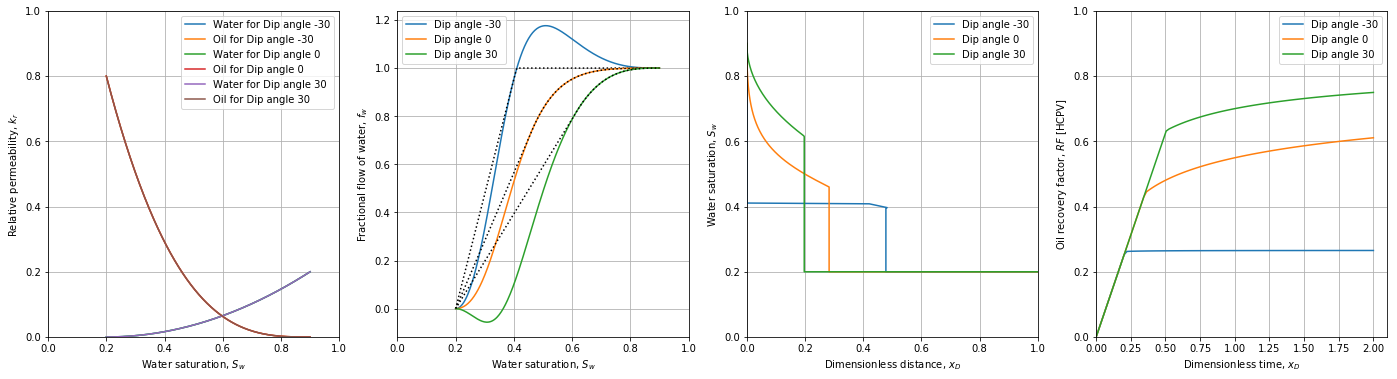

In [0]:
theta_list = [-30, 0 , 30]

d_core = {'Swc':0.2, 'Sor':0.1, 'krw0':0.2, 'kro0':0.8, 'nw':2, 'no':3}
d_fluid = {'muw':0.5, 'muo':10}

fig, ax = plt.subplots(1,4,figsize=(24, 6))

for theta in theta_list:
    # bl = BL(**d)
    bl = BL(**d_core, **d_fluid, **{'label':'Dip angle '+str(theta)})
    bl.enable_gravity(theta, k=10, drho=0.2, ut=0.1)
    bl.calc()

    tD = np.linspace(start=0, stop=2, num = 100)
    
    # Plot ######
    # Relative permeability
    ax[0].plot(bl.Sw, bl.krw, label='Water for '+bl.label)
    ax[0].plot(bl.Sw, bl.kro, label='Oil for '+bl.label)
    
    # Fractional flow of water
    ax[1].plot(bl.Sw, bl.fw, label=bl.label)
    ax[1].plot(bl.Sw, bl.fw_wSF, 'k:')

    # Saturation profile at specific time
    xD, Sw = bl.get_Sw_profile(tD=0.1)
    ax[2].plot(xD, Sw, label=bl.label)

    # Oil recovery
    ax[3].plot(tD, bl.get_oil_RF(tD), label=bl.label)
    

def adjust_ax(ax, xlabel=None, ylabel=None, xlim=(0,1), ylim=(0,1)):
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid()


adjust_ax(ax[0], 'Water saturation, $S_w$', 'Relative permeability, $k_r$')
adjust_ax(ax[1], 'Water saturation, $S_w$', 'Fractional flow of water, $f_w$', ylim=None)
adjust_ax(ax[2], 'Dimensionless distance, $x_D$', 'Water saturation, $S_w$')
adjust_ax(ax[3], 'Dimensionless time, $x_D$', 'Oil recovery factor, $RF$ [HCPV]', xlim=(0))

Dip angleの違いにより，水のフラクショナルフロー関数の形状が異なるようになりました．

Dip angleが負の場合，水と油の密度差により，フラクショナルフロー関数に負の領域が現れます．ショックフロントの飽和率領域が大きく，飽和率プロファイルはピストンライクな置換を示すようになります．安定で効率的な置換が起こり，高い回収率が期待できます．

一方，Dip angleが正の場合，水と油の密度差により，フラクショナルフロー関数に1を超える領域（対向流）が現れます．ショックフロントの飽和率領域が小さく，速い進展，早期のブレークスルーが予測されます．非効率的な置換が起こり，回収率はあまり期待できなさそうです．


*End of notebook...*